# Basic setups

In [1]:
%load_ext autoreload
%autoreload 2

import os
import re
import shutil
import random
import pprint
import itertools
import functools
import collections

import pysam
import pyranges as pr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/users/pjh/scripts/python_genome_package_dev/')

In [3]:
from handygenome import common
from handygenome.common import ChromDict
from handygenome.variant.vcfspec import Vcfspec
from handygenome.sv.breakends import Breakends
from handygenome.variant.variantplus import VariantPlus, VariantPlusList
from handygenome.igvhandle import IGVHandle

[W::hts_idx_load3] The index file is older than the data file: /home/users/pjh/scripts/python_genome_packages/data/popfreq/dbSNP_b155_GRCh37.p13.vcf.gz.csi


In [4]:
FASTA_HG19 = common.DEFAULT_FASTAS['hg19']
FASTA_HG38 = common.DEFAULT_FASTAS['hg38']
CHROMDICT_HG19 = common.DEFAULT_CHROMDICTS['hg19']
CHROMDICT_HG38 = common.DEFAULT_CHROMDICTS['hg38']

In [5]:
igv = IGVHandle(60387)

# Scratches

In [6]:
in_vcf_path = '/home/users/pjh/practice/pipeline_test/handygenome/readstatsannot/output2.vcf.gz'

In [7]:
bam_path_dict = {
    'tumor': '/home/users/team_projects/PCNSL/WGS/01_BAM/LY12_C.bam',
    'normal': '/home/users/team_projects/PCNSL/WGS/01_BAM/LY12_N.bam',
}
bam_dict = {sid: pysam.AlignmentFile(path) for sid, path in bam_path_dict.items()}

In [8]:
vplist = VariantPlusList.from_vcf(in_vcf_path)

In [9]:
vplist

<VariantPlusList of length 10 [
	0	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=69,496, ref='G', alts=('A',)), gene=alt_index 0: )>
	1	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=235,751, ref='A', alts=('C',)), gene=alt_index 0: )>
	2	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=1,003,863, ref='C', alts=('T',)), gene=alt_index 0: )>
	3	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=1,421,025, ref='G', alts=('T',)), gene=alt_index 0: )>
	4	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=1,656,274, ref='C', alts=('T',)), gene=alt_index 0: )>
	5	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=1,986,381, ref='T', alts=('C',)), gene=alt_index 0: )>
	6	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=2,009,373, ref='T', alts=('C',)), gene=alt_index 0: )>
	7	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=2,724,181, ref='C', alts=('A',)), gene=alt_index 0: )>
	8	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=2,923,478, ref='G', alts=('A',)), gene=alt_index 0: )>
	9	<VariantPlus(vcfspec=Vcfspec(chrom='1', pos=2,985,89

In [34]:
vp = vplist[1]

In [35]:
vp.show_igv(igv, bam_dict)

OK
OK
OK
OK
OK
OK
OK


In [36]:
import handygenome.variant.filter as libfilter
filterlist = libfilter.get_preset_filter(pon_cohorts=['BGI', 'PCAWG'])

In [37]:
filterlist.check(vp, 'LY12_C')

True

In [38]:
filterlist.check_show(vp, 'LY12_C')

True    <DiffMeanBQFilter ({'cutoff': -5})>
True    <AbsMeanBQFilter ({'cutoff': 20})>
True    <DiffMeanMQFilter ({'cutoff': -15})>
True    <AbsMeanMQFilter ({'cutoff': 40})>
True    <ClipoverlapFilter ({'cutoff': 1})>
True    <ReadcountFilter ({'cutoff': 2})>
True    <OthercountRatioFilter ({'cutoff': 1.5, 'ref_length_cutoff': None})>
True    <VarposUniformFilter ({'cutoff': 0.05})>
True    <PonFilterWGS (samples=['BGI-WG01', 'BGI-WG02', 'BGI-WG03', 'BGI-WG04', 'BGI-WG05', 'BGI-WG06', 'BGI-WG07', 'BGI-WG08', 'BGI-WG09', 'BGI-WG10', 'BGI-WG11', 'BGI-WG12', 'BGI-WG13', 'BGI-WG14', 'BGI-WG15', 'BGI-WG16', 'BGI-WG17', 'BGI-WG18', 'BGI-WG19', 'BGI-WG20', 'BGI-WG21', 'BGI-WG22', 'BGI-WG23', 'BGI-WG24', 'TCGA-05-4389', 'TCGA-05-4395', 'TCGA-05-4396', 'TCGA-05-4397', 'TCGA-05-4398', 'TCGA-05-4420', 'TCGA-05-5429', 'TCGA-38-4628', 'TCGA-44-2659', 'TCGA-44-6148', 'TCGA-49-4486', 'TCGA-49-4512', 'TCGA-49-6742', 'TCGA-50-5930', 'TCGA-50-5932', 'TCGA-50-6591', 'TCGA-50-6597', 'TCGA-55-6972', 'TCGA

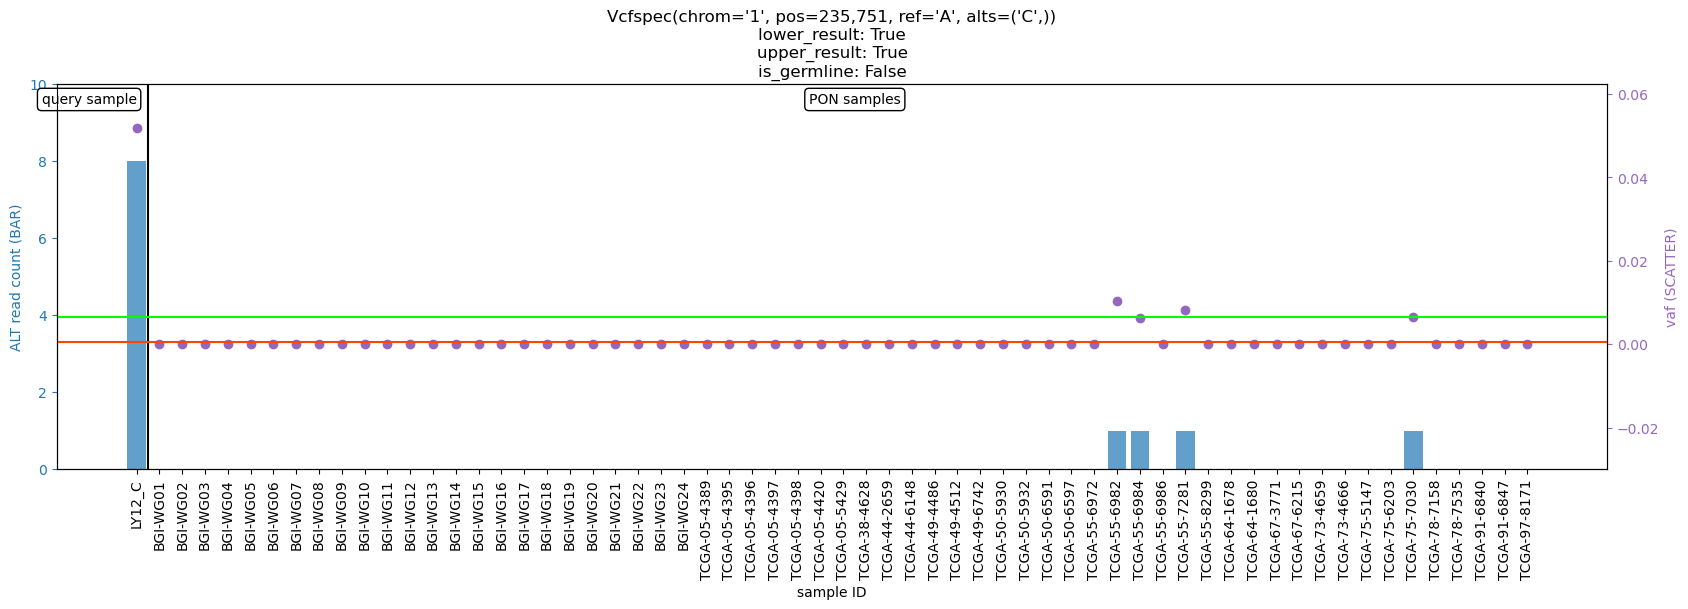

In [40]:
vp.show_pon(query_sample='LY12_C', pon_cohorts=('BGI', 'PCAWG'))

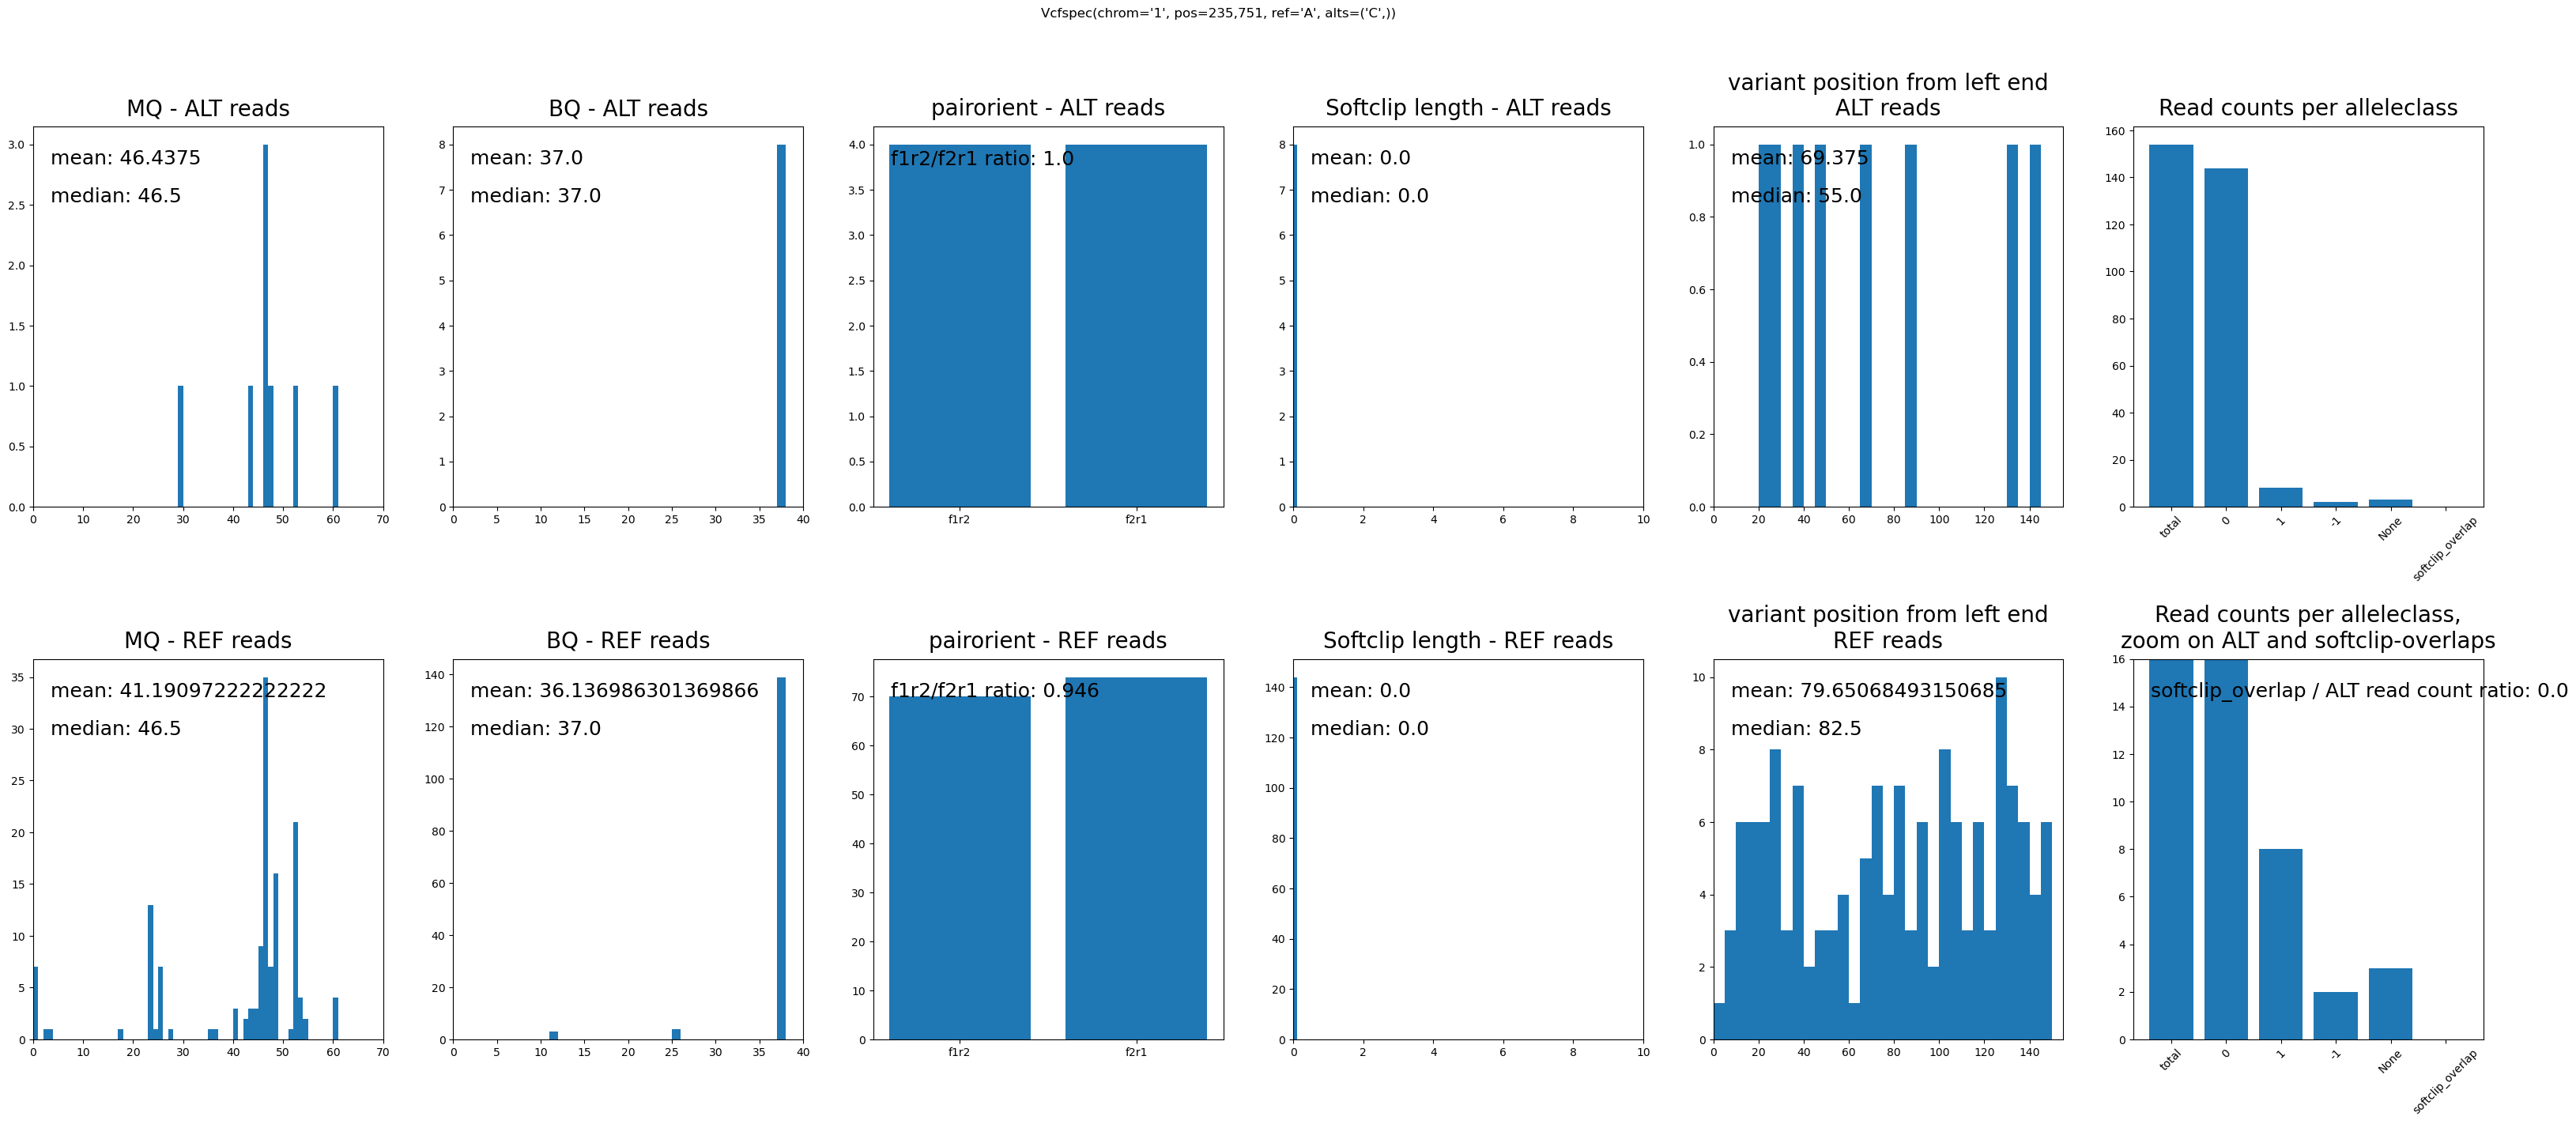

In [41]:
vp.show_filterinfo(bam_dict['tumor'])